### Quickstart Example

https://emcee.readthedocs.io/en/stable/tutorials/quickstart/

In [5]:
import numpy as np
import emcee
import matplotlib.pyplot as plt

In [ ]:
# Define the multivariate Gaussian density

def log_prob(x, mu, cov):
    diff = x - mu
    return -0.5 * np.dot(diff, np.linalg.solve(cov, diff))

In [ ]:
# Specify the values of the mean and the covariance matrix

ndim = 5

np.random.seed(42)
means = np.random.rand(ndim)

cov = 0.5 - np.random.rand(ndim**2).reshape((ndim, ndim))
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov, cov)

# Define 32 walkers (32-by-5 array) with a random number between 0 and 1 for each component 
nwalkers = 32
p0 = np.random.rand(nwalkers, ndim)

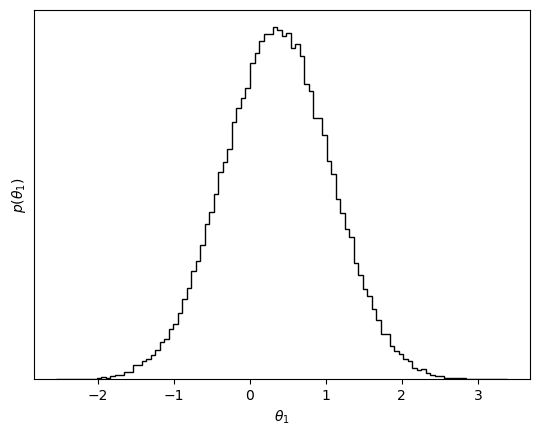

In [6]:
# Define the EnsembleSampler object
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[means, cov])

# Run 100 "burn-in" steps
state = sampler.run_mcmc(p0, 100)
sampler.reset()

# Perform 1000 steps
sampler.run_mcmc(state, 10000)

# Plot the estimated density
samples = sampler.get_chain(flat=True)
plt.hist(samples[:, 0], 100, color="k", histtype="step")
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$p(\theta_1)$")
plt.gca().set_yticks([]);

In [7]:
print(
    "Mean acceptance fraction: {0:.3f}".format(
        np.mean(sampler.acceptance_fraction)
    )
)

print(
    "Mean autocorrelation time: {0:.3f} steps".format(
        np.mean(sampler.get_autocorr_time())
    )
)

Mean acceptance fraction: 0.552
Mean autocorrelation time: 57.112 steps
